# pandas 进阶修炼 ｜早起Python
<br>

**本习题由公众号【早起Python & 可视化图鉴】 原创，转载及其他形式合作请与我们联系（微信号`sshs321`)，未经授权严禁搬运及二次创作，侵权必究！**



本习题基于 `pandas` 版本 `1.1.3`，所有内容应当在 `Jupyter Notebook` 中执行以获得最佳效果。


不同版本之间写法可能会有少许不同，如若碰到此情况，你应该学会如何自行检索解决。

## 8 - 金融数据与时间处理



<br>

**<font color = '#5172F0'><font size=3.5>必读👇👇👇**</font>
    
 
有关于 pandas 的常用操作，在前面几个章节已经基本介绍完毕。
    
但是在利用 pandas 进行数据分析时，一个很重要的操作就是与带有时间属性的数据进行交互。
    
并且常常与股票、基金、数字货币等数据相关。
    
因此，本章是一个专题练习，将介绍
- pandas操作时间
- 股票数据分析
- k线图制作



## 初始化

<br>

该 `Notebook` 版本为**纯习题版**

如果需要答案或者提示，可以微信搜索公众号「早起Python」获取！

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## 8-1 pandas中的时间操作

### 1 - 时间生成｜当前时间

使用 pandas 获取当前时间


In [2]:
# pd.datetime.now()
import datetime
datetime.datetime.now()

datetime.datetime(2021, 10, 14, 17, 9, 1, 559280)

### 2 - 时间生成｜指定范围

使用 pandas 按天生成 2021年1月1日 至 2021年9月1日的全部日期

In [3]:
pd.date_range(start='2021-01-01', end='2021-09-01',freq='D')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-28', '2021-08-29', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', length=244, freq='D')

### 3 - 时间生成｜指定长度

使用 pandas 从 2021年1月1日开始，按天生成 10 天日期

In [4]:
pd.date_range(start='2021-01-01', periods=10, freq='D')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10'],
              dtype='datetime64[ns]', freq='D')

### 4 - 时间生成｜指定频率

使用 pandas 从 2021年1月1日开始，按周生成 7 周日期

In [5]:
pd.date_range(start='2021-01-01', periods=7, freq='W-MON')

DatetimeIndex(['2021-01-04', '2021-01-11', '2021-01-18', '2021-01-25',
               '2021-02-01', '2021-02-08', '2021-02-15'],
              dtype='datetime64[ns]', freq='W-MON')

### 5 - 时间生成｜特殊规律

使用 pandas 按天生成 2021年1月1日 至 2021年9月1日的全部**工作日**日期

In [6]:
pd.date_range(start='2021-01-01', end='2021-09-01', freq='B')

DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', length=174, freq='B')

### 6 - 时间计算｜时间差（天）

使用 pandas 计算 2021年2月14日 距离今天相差多少天

In [7]:
today = datetime.datetime.now()
(pd.to_datetime(today) - pd.to_datetime('2021-02-14')).days

242

### 7 - 时间计算｜时间差（小时）

使用 pandas 计算 2021年9月1日13点14分 距离今天相差多少小时

In [8]:
today = datetime.datetime.now()
(pd.to_datetime(today) - pd.to_datetime('2021-02-14')).total_seconds() / (3600)

5825.150490757222

### 8 - 时间运算

将第一题得到的时间减去一天

In [9]:
today = datetime.datetime.now()
pd.to_datetime(today) - pd.Timedelta(days = 1)

Timestamp('2021-10-13 17:09:01.826564')

### 9 - 时间格式化

将上一题的结果式化为 xx年xx月xx日-xx时xx分xx秒

In [10]:
today = datetime.datetime.now()
(pd.to_datetime(today) - pd.Timedelta(days = 1)).strftime("%Y年%m月%d日 %H时%M分%S秒")

'2021年10月13日 17时09分01秒'

## 8-2 股票数据分析

### 10 - 加载数据

本小节的数据将通过 [akshare](https://www.akshare.xyz/data/stock/stock.html#id8) 获取

如果你的电脑上未安装 akshare，可以执行下方代码进行安装

In [24]:
# ! pip install akshare

In [2]:
import pandas as pd
#import akshare as ak

如果任何原因安装、导入失败，可以取消下方代码的注释，从本地读取数据

In [3]:
# 日线
#df1 = ak.stock_zh_a_hist(symbol="000001", period="daily", start_date="20170101", end_date='20210914', adjust="qfq")
# df1 = ak.stock_zh_a_hist(symbol="000001", start_date="20170101", end_date='20210914', adjust="qfq")
df1 = pd.read_csv("000001_daily.csv")
# 5min
# df2 = ak.stock_zh_a_hist_min_em(symbol="000001", period='5', adjust='qfq', start_date="2021-08-01 09:32:00", end_date="2021-09-14 09:32:00")
df2 = pd.read_csv("000001_5min.csv")

### 11 - 查看数据类型

查看 df1 各列的数据类型

In [4]:
df1.dtypes

日期      object
开盘     float64
收盘     float64
最高     float64
最低     float64
成交量      int64
成交额      int64
振幅     float64
涨跌幅    float64
涨跌额    float64
换手率    float64
dtype: object

### 12 - 时间类型转换

将 df1 和 df2 的 日期 列转换为 pandas 支持的时间格式

In [5]:
df1['日期'] = pd.to_datetime(df1.日期)
df1

日期     开盘     收盘     最高     最低      成交量         成交额     振幅   涨跌幅  \
0    2017-01-03   8.27   8.32   8.34   8.25   459840   420595184   1.09  0.73   
1    2017-01-04   8.31   8.32   8.34   8.30   449330   411503440   0.48  0.00   
2    2017-01-05   8.33   8.33   8.34   8.31   344373   315769696   0.36  0.12   
3    2017-01-06   8.33   8.29   8.33   8.27   358154   327176432   0.72 -0.48   
4    2017-01-09   8.29   8.31   8.33   8.27   361082   329994608   0.72  0.24   
...         ...    ...    ...    ...    ...      ...         ...    ...   ...   
1141 2021-09-08  19.24  19.23  19.55  19.10  1026201  1979771472   2.34 -0.05   
1142 2021-09-09  19.11  19.00  19.15  18.80   739506  1399536016   1.82 -1.20   
1143 2021-09-10  18.89  20.57  20.77  18.84  2314945  4668361728  10.16  8.26   
1144 2021-09-13  20.36  20.21  20.51  19.81  1297228  2606152384   3.40 -1.75   
1145 2021-09-14  20.18  19.37  20.27  19.27  1158173  2272080160   4.95 -4.16   

       涨跌额   换手率  
0     0.06  0.31  
1     0.00  0.31  
2     0.01  0.24  
3    -0.04  0.24  
4     0.02  0.21  
...    ...   ...  
1141 -0.01  0.53  
1142 -0.23  0.38  
1143  1.57  1.19  
1144 -0.36  0.67  
1145 -0.84  0.60  

[1146 rows x 11 columns]

In [7]:
df2.时间 = pd.to_datetime(df2.时间)

### 13 - 日期筛选｜区间

筛选出 df2 时间在 `2021-08-03 09:35:00` 与 `2021-08-04 15:00:00` 之间的数据

In [13]:
df2[(df2.时间 > pd.to_datetime('2021-08-03 09:35:00')) & (df2.时间 < pd.to_datetime('2021-08-04 15:00:00'))]

时间     开盘     收盘     最高     最低   涨跌幅   涨跌额    成交量  \
1  2021-08-03 09:40:00  17.77  17.76  17.83  17.66 -0.11 -0.02  41508   
2  2021-08-03 09:45:00  17.77  17.77  17.83  17.73  0.06  0.01  18521   
3  2021-08-03 09:50:00  17.77  17.72  17.78  17.70 -0.28 -0.05  24424   
4  2021-08-03 09:55:00  17.71  17.77  17.78  17.70  0.28  0.05  23197   
5  2021-08-03 10:00:00  17.78  17.81  17.83  17.74  0.23  0.04  18111   
..                 ...    ...    ...    ...    ...   ...   ...    ...   
90 2021-08-04 14:35:00  17.81  17.81  17.83  17.78  0.00  0.00  12903   
91 2021-08-04 14:40:00  17.82  17.80  17.85  17.79 -0.06 -0.01  12254   
92 2021-08-04 14:45:00  17.82  17.82  17.84  17.80  0.11  0.02   9893   
93 2021-08-04 14:50:00  17.81  17.80  17.83  17.80 -0.11 -0.02  12127   
94 2021-08-04 14:55:00  17.80  17.81  17.84  17.79  0.06  0.01  17028   

         成交额    振幅   换手率  
1   73683531  0.96  0.02  
2   32915794  0.56  0.01  
3   43323693  0.45  0.01  
4   41110937  0.45  0.01  
5   32208076  0.51  0.01  
..       ...   ...   ...  
90  22973276  0.28  0.01  
91  21835743  0.34  0.01  
92  17631076  0.22  0.01  
93  21603534  0.17  0.01  
94  30332096  0.28  0.01  

[94 rows x 11 columns]

In [8]:
df1[(df1.日期 >= pd.to_datetime('2021-08-01')) & (df1.日期 <= pd.to_datetime('2021-08-31'))].style.highlight_between(right=0.0, subset=['涨跌幅'])

![公众号：早起Python](http://liuzaoqi.oss-cn-beijing.aliyuncs.com/2021/09/18/16319660121648.jpg?域名/sample.jpg?x-oss-process=style/stylename)

### 14 - 日期筛选｜指定

筛选 df2 时间为 2021-08-03 的全部数据

In [19]:
df2[df2.时间.dt.date == '2021-08-03']

Empty DataFrame
Columns: [时间, 开盘, 收盘, 最高, 最低, 涨跌幅, 涨跌额, 成交量, 成交额, 振幅, 换手率]
Index: []

### 15 - 金融计算｜涨跌额

`df1` 新增一列 涨跌，计算前后两日收盘价之差

注意：虽然我们的df1包含涨跌额列，但是这个操作很常用，所以练习一下

In [17]:
df1['涨跌'] = df1.shift(-1)['收盘'] - df1['收盘']
df1

日期     开盘     收盘     最高     最低      成交量           成交额     振幅  \
0    2017-01-03   8.27   8.32   8.34   8.25   459840  4.205952e+08   1.09   
1    2017-01-04   8.31   8.32   8.34   8.30   449330  4.115034e+08   0.48   
2    2017-01-05   8.33   8.33   8.34   8.31   344373  3.157697e+08   0.36   
3    2017-01-06   8.33   8.29   8.33   8.27   358154  3.271764e+08   0.72   
4    2017-01-09   8.29   8.31   8.33   8.27   361082  3.299946e+08   0.72   
...         ...    ...    ...    ...    ...      ...           ...    ...   
1141 2021-09-08  19.24  19.23  19.55  19.10  1026201  1.979771e+09   2.34   
1142 2021-09-09  19.11  19.00  19.15  18.80   739506  1.399536e+09   1.82   
1143 2021-09-10  18.89  20.57  20.77  18.84  2314945  4.668362e+09  10.16   
1144 2021-09-13  20.36  20.21  20.51  19.81  1297228  2.606152e+09   3.40   
1145 2021-09-14  20.18  19.37  20.27  19.27  1158173  2.272080e+09   4.95   

       涨跌幅   涨跌额   换手率    涨跌  
0     0.73  0.06  0.31  0.00  
1     0.00  0.00  0.31  0.01  
2     0.12  0.01  0.24 -0.04  
3    -0.48 -0.04  0.24  0.02  
4     0.24  0.02  0.21  0.00  
...    ...   ...   ...   ...  
1141 -0.05 -0.01  0.53 -0.23  
1142 -1.20 -0.23  0.38  1.57  
1143  8.26  1.57  1.19 -0.36  
1144 -1.75 -0.36  0.67 -0.84  
1145 -4.16 -0.84  0.60   NaN  

[1146 rows x 12 columns]

### 16 - 金融计算｜涨跌幅

`df1` 新增一列 涨跌变化率，计算前后两日收盘价之差的变化率

注意：虽然我们的df1包含涨跌幅列，但是这个操作很常用，所以练习一下，结果可以用于验证

In [18]:
df1['涨跌变化率'] = (df1.shift(-1).收盘 - df1.shift(1).收盘) / df1.shift(1).收盘
df1

日期     开盘     收盘     最高     最低      成交量           成交额     振幅  \
0    2017-01-03   8.27   8.32   8.34   8.25   459840  4.205952e+08   1.09   
1    2017-01-04   8.31   8.32   8.34   8.30   449330  4.115034e+08   0.48   
2    2017-01-05   8.33   8.33   8.34   8.31   344373  3.157697e+08   0.36   
3    2017-01-06   8.33   8.29   8.33   8.27   358154  3.271764e+08   0.72   
4    2017-01-09   8.29   8.31   8.33   8.27   361082  3.299946e+08   0.72   
...         ...    ...    ...    ...    ...      ...           ...    ...   
1141 2021-09-08  19.24  19.23  19.55  19.10  1026201  1.979771e+09   2.34   
1142 2021-09-09  19.11  19.00  19.15  18.80   739506  1.399536e+09   1.82   
1143 2021-09-10  18.89  20.57  20.77  18.84  2314945  4.668362e+09  10.16   
1144 2021-09-13  20.36  20.21  20.51  19.81  1297228  2.606152e+09   3.40   
1145 2021-09-14  20.18  19.37  20.27  19.27  1158173  2.272080e+09   4.95   

       涨跌幅   涨跌额   换手率    涨跌     涨跌变化率  
0     0.73  0.06  0.31  0.00       NaN  
1     0.00  0.00  0.31  0.01  0.001202  
2     0.12  0.01  0.24 -0.04 -0.003606  
3    -0.48 -0.04  0.24  0.02 -0.002401  
4     0.24  0.02  0.21  0.00  0.002413  
...    ...   ...   ...   ...       ...  
1141 -0.05 -0.01  0.53 -0.23 -0.012474  
1142 -1.20 -0.23  0.38  1.57  0.069683  
1143  8.26  1.57  1.19 -0.36  0.063684  
1144 -1.75 -0.36  0.67 -0.84 -0.058337  
1145 -4.16 -0.84  0.60   NaN       NaN  

[1146 rows x 13 columns]

### 17 - 金融计算｜移动均值

计算收盘价的5日移动均线

In [19]:
df1['5日均值'] = df1.收盘.rolling(5, min_periods=1).mean()

### 18 - 金融计算｜移动均值（可视化）

计算并绘制收盘价的5日移动均线

C:\Users\songzhao\AppData\Local\Temp/ipykernel_104688/2427062515.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df1.日期.map(lambda x: x.strftime('%Y-%m-%d')))


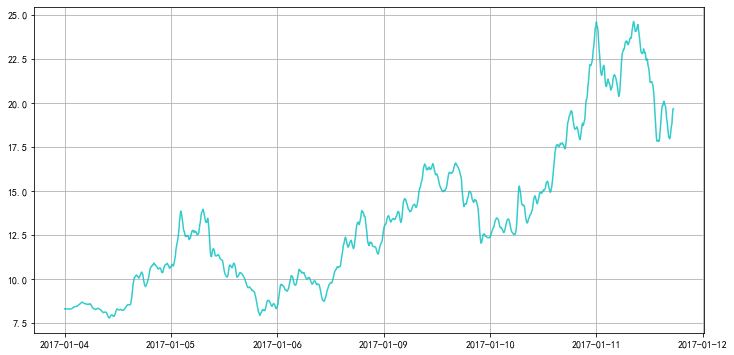

In [38]:
ax = df1['5日均值'].plot(figsize=(12,6), color='c', alpha=0.8, grid=True)
ax.set_xticklabels(df1.日期.map(lambda x: x.strftime('%Y-%m-%d')))
plt.show()

### 19 - 金融计算｜移动均值（可视化）

同时计算并绘制 df1 的收盘价、5日均线、20日均线

C:\Users\songzhao\AppData\Local\Temp/ipykernel_104688/877426594.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df1.日期.map(lambda x: x.strftime('%Y-%m-%d')))


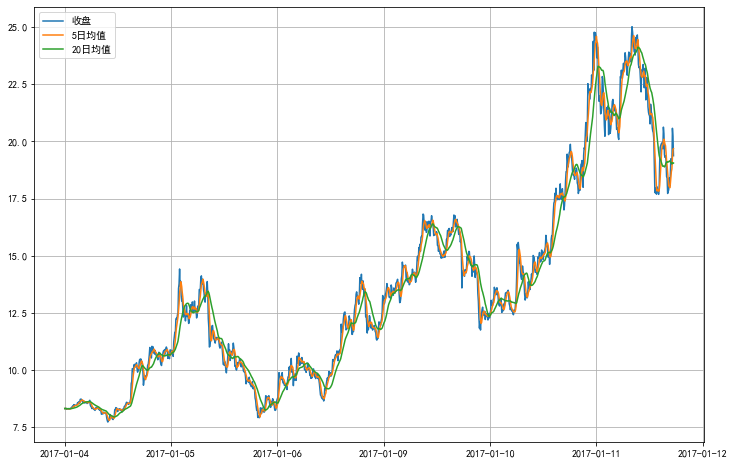

In [35]:
df1['20日均值'] = df1.收盘.rolling(20, min_periods=1).mean()
ax = df1[['收盘', '5日均值', '20日均值']].plot(figsize=(12,8), grid = True)
ax.set_xticklabels(df1.日期.map(lambda x: x.strftime('%Y-%m-%d')))
plt.show()

### 20 - 金融计算｜指数移动平均值（EMA）

根据 df1 计算 EMA20

<AxesSubplot:>

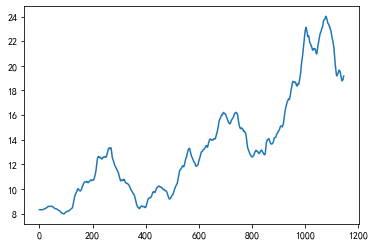

In [89]:
df1['收盘'].ewm(span=20).mean().plot()

### 21 - 金融计算｜MACD

计算 df1 的 MACD 指标

<AxesSubplot:>

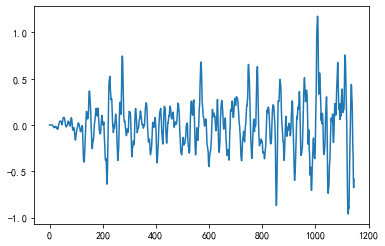

In [96]:
# MACD计算公式
# MACD在应用上,，先计算出快速移动平均线即12日的EMA1，和慢速移动平均线，即26日的EMA2,，以这两个数值之间的差值得出DIFF,，然后再求出DIFF的9日平滑移动平均线DEA.，最后得出MACD=2×(DIFF－DEA). 。

#ema1 = df1['收盘'].rolling(12,min_periods = 1).mean()
ema1 = df1['收盘'].ewm(span=12, min_periods=1).mean()
#ema2 = df1['收盘'].rolling(26,min_periods = 1).mean()
ema2 = df1['收盘'].ewm(span=26, min_periods=1).mean()
diff = ema2 - ema1
dea = diff.rolling(9,min_periods=1).mean()
macd = 2 * (diff - dea)

macd.plot()


### 22 - 金融计算｜布林指标

计算并绘制布林指标，计算方法参考[百度百科](https://baike.baidu.com/item/%E5%B8%83%E6%9E%97%E7%BA%BF%E6%8C%87%E6%A0%87/3325894?fromtitle=%E5%B8%83%E6%9E%97%E6%8C%87%E6%A0%87&fromid=258891&fr=aladdin)


### 23 - 日期移动｜值

将 df1 的索引设置为日期，将 df1 数据向后移动一天

In [99]:
df1.set_index('日期').shift(1)

开盘     收盘     最高     最低        成交量           成交额     振幅   涨跌幅  \
日期                                                                             
2017-01-03    NaN    NaN    NaN    NaN        NaN           NaN    NaN   NaN   
2017-01-04   8.27   8.32   8.34   8.25   459840.0  4.205952e+08   1.09  0.73   
2017-01-05   8.31   8.32   8.34   8.30   449330.0  4.115034e+08   0.48  0.00   
2017-01-06   8.33   8.33   8.34   8.31   344373.0  3.157697e+08   0.36  0.12   
2017-01-09   8.33   8.29   8.33   8.27   358154.0  3.271764e+08   0.72 -0.48   
...           ...    ...    ...    ...        ...           ...    ...   ...   
2021-09-08  18.60  19.24  19.56  18.35  1622344.0  3.067366e+09   6.56  4.28   
2021-09-09  19.24  19.23  19.55  19.10  1026201.0  1.979771e+09   2.34 -0.05   
2021-09-10  19.11  19.00  19.15  18.80   739506.0  1.399536e+09   1.82 -1.20   
2021-09-13  18.89  20.57  20.77  18.84  2314945.0  4.668362e+09  10.16  8.26   
2021-09-14  20.36  20.21  20.51  19.81  1297228.0  2.606152e+09   3.40 -1.75   

             涨跌额   换手率    涨跌     涨跌变化率       5日均值      20日均值  
日期                                                            
2017-01-03   NaN   NaN   NaN       NaN        NaN        NaN  
2017-01-04  0.06  0.31  0.00       NaN   8.320000   8.320000  
2017-01-05  0.00  0.31  0.01  0.001202   8.320000   8.320000  
2017-01-06  0.01  0.24 -0.04 -0.003606   8.323333   8.323333  
2017-01-09 -0.04  0.24  0.02 -0.002401   8.315000   8.315000  
...          ...   ...   ...       ...        ...        ...  
2021-09-08  0.79  0.84 -0.01  0.042276  18.402000  19.089500  
2021-09-09 -0.01  0.53 -0.23 -0.012474  18.672000  19.060500  
2021-09-10 -0.23  0.38  1.57  0.069683  18.792000  19.016000  
2021-09-13  1.57  1.19 -0.36  0.063684  19.298000  19.050000  
2021-09-14 -0.36  0.67 -0.84 -0.058337  19.650000  19.063000  

[1146 rows x 14 columns]

### 24 - 日期移动｜索引

将 df1 的索引设置为日期，并将全部日期向后移动一天

In [112]:
df1.set_index('日期').index + pd.Timedelta(days = 1)

DatetimeIndex(['2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07',
               '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13',
               '2017-01-14', '2017-01-17',
               ...
               '2021-09-02', '2021-09-03', '2021-09-04', '2021-09-07',
               '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-11',
               '2021-09-14', '2021-09-15'],
              dtype='datetime64[ns]', name='日期', length=1146, freq=None)

In [113]:
df1.set_index('日期').index.shift(1, freq='D')

DatetimeIndex(['2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07',
               '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13',
               '2017-01-14', '2017-01-17',
               ...
               '2021-09-02', '2021-09-03', '2021-09-04', '2021-09-07',
               '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-11',
               '2021-09-14', '2021-09-15'],
              dtype='datetime64[ns]', name='日期', length=1146, freq=None)

### 25 - 日期重采样｜日 -> 周

按周对 df1 进行重采样，保留每周最后一个数据

In [119]:
df1[df1.日期.isin(pd.date_range(start=df1.iloc[0].日期, end=df1.iloc[len(df1)-1].日期, freq='W-MON'))]


日期     开盘     收盘     最高     最低      成交量           成交额    振幅  \
4    2017-01-09   8.29   8.31   8.33   8.27   361082  3.299946e+08  0.72   
9    2017-01-16   8.31   8.30   8.32   8.23   683166  6.230258e+08  1.08   
14   2017-01-23   8.38   8.38   8.42   8.36   420299  3.880191e+08  0.72   
19   2017-02-06   8.42   8.47   8.48   8.42   516786  4.804413e+08  0.71   
24   2017-02-13   8.50   8.57   8.60   8.49   638365  5.999510e+08  1.30   
...         ...    ...    ...    ...    ...      ...           ...   ...   
1124 2021-08-16  20.09  19.95  20.20  19.57   627050  1.247681e+09  3.17   
1129 2021-08-23  19.50  19.30  20.05  19.11  1191849  2.315872e+09  4.84   
1134 2021-08-30  18.21  17.72  18.29  17.55  1252211  2.221856e+09  4.02   
1139 2021-09-06  17.93  18.45  18.60  17.78  1515226  2.780281e+09  4.55   
1144 2021-09-13  20.36  20.21  20.51  19.81  1297228  2.606152e+09  3.40   

       涨跌幅   涨跌额   换手率    涨跌     涨跌变化率    5日均值      20日均值  
4     0.24  0.02  0.21  0.00  0.002413   8.314   8.314000  
9    -0.24 -0.02  0.40  0.01 -0.001202   8.308   8.311000  
14    0.00  0.00  0.25  0.05  0.005967   8.348   8.323333  
19    0.59  0.05  0.31 -0.01  0.004751   8.446   8.354000  
24    0.94  0.08  0.38 -0.01  0.008245   8.490   8.398000  
...    ...   ...   ...   ...       ...     ...        ...  
1124  0.30  0.06  0.32 -0.28 -0.011061  19.854  18.953500  
1129 -0.62 -0.12  0.61  0.06 -0.003090  19.870  18.904500  
1134 -3.64 -0.67  0.65  0.08 -0.032083  18.618  19.100500  
1139  2.27  0.41  0.78  0.79  0.066519  18.114  19.114000  
1144 -1.75 -0.36  0.67 -0.84 -0.058337  19.650  19.063000  

[223 rows x 15 columns]

### 26 - 日期重采样｜日 -> 月

按月对 df1 进行重采样，保留每月最后一个数据

In [120]:
df1[df1.日期.isin(pd.date_range(start=df1.iloc[0].日期, end=df1.iloc[len(df1)-1].日期, freq='M'))]

日期     开盘     收盘     最高     最低      成交量           成交额    振幅  \
35   2017-02-28   8.59   8.64   8.67   8.58   369720  3.503669e+08  1.05   
58   2017-03-31   8.24   8.33   8.34   8.24   633121  5.785790e+08  1.21   
96   2017-05-31   8.26   8.36   8.39   8.22  1033211  9.487419e+08  2.06   
118  2017-06-30   8.56   8.55   8.59   8.47   499633  4.680035e+08  1.40   
139  2017-07-31  10.12   9.99  10.14   9.77  1575864  1.671814e+09  3.68   
162  2017-08-31  10.71  10.60  10.76  10.47  1151786  1.297731e+09  2.70   
200  2017-10-31  10.87  10.86  10.90  10.71   627491  7.212375e+08  1.75   
222  2017-11-30  13.02  12.70  13.05  12.58  1379636  1.866701e+09  3.58   
265  2018-01-31  12.92  13.37  13.37  12.85  1747729  2.423105e+09  4.01   
280  2018-02-28  11.42  11.37  11.51  11.25  1214146  1.463314e+09  2.24   
342  2018-05-31   9.43   9.50   9.51   9.34   987360  9.992163e+08  1.81   
384  2018-07-31   8.83   8.88   8.95   8.71   720151  6.744847e+08  2.71   
407  2018-08-31   9.59   9.59   9.78   9.56  1310865  1.337899e+09  2.30   
444  2018-10-31  10.41  10.37  10.45  10.21  1152684  1.252157e+09  2.32   
466  2018-11-30   9.68   9.82   9.82   9.63   594715  6.105715e+08  1.97   
508  2019-01-31  10.44  10.56  10.66  10.40   831623  9.226029e+08  2.50   
523  2019-02-28  11.90  11.82  12.07  11.73  1113100  1.383111e+09  2.87   
565  2019-04-30  13.45  13.31  13.51  13.05  1116570  1.542959e+09  3.39   
585  2019-05-31  11.62  11.64  11.86  11.57   686794  8.393757e+08  2.48   
627  2019-07-31  13.90  13.73  13.92  13.68   634723  8.992279e+08  1.72   
669  2019-09-30  15.35  15.19  15.49  15.17  1046363  1.645829e+09  2.06   
687  2019-10-31  16.02  15.86  16.07  15.84   862569  1.407006e+09  1.43   
730  2019-12-31  16.17  16.05  16.23  15.91   704442  1.154704e+09  1.98   
788  2020-03-31  12.65  12.40  12.69  12.38   513370  6.629155e+08  2.47   
809  2020-04-30  13.62  13.53  13.92  13.48   819540  1.155968e+09  3.23   
847  2020-06-30  12.65  12.62  12.70  12.54   937940  1.199182e+09  1.27   
870  2020-07-31  13.10  13.16  13.35  13.07  1165822  1.559068e+09  2.12   
891  2020-08-31  15.12  14.90  15.50  14.81  1797130  2.760350e+09  4.62   
913  2020-09-30  14.62  14.99  15.09  14.62  1217065  1.838548e+09  3.21   
950  2020-11-30  19.72  19.56  20.70  19.41  1581441  3.213680e+09  6.61   
973  2020-12-31  19.03  19.16  19.40  18.84   924503  1.781736e+09  2.94   
1031 2021-03-31  21.59  21.83  21.89  21.42   777028  1.699922e+09  2.16   
1052 2021-04-30  23.17  23.11  23.31  22.83   561981  1.308177e+09  2.05   
1070 2021-05-31  24.33  24.20  24.53  23.91   515351  1.244209e+09  2.53   
1091 2021-06-30  22.36  22.62  22.93  22.35   403435  9.132852e+08  2.60   
1135 2021-08-31  17.72  17.80  17.93  17.31  1174868  2.072007e+09  3.50   

       涨跌幅   涨跌额   换手率    涨跌     涨跌变化率    5日均值    20日均值  
35    0.58  0.05  0.22  0.01  0.006985   8.658   8.5665  
58    1.09  0.09  0.37  0.04  0.015777   8.284   8.4575  
96    1.21  0.10  0.61 -0.01  0.010896   8.160   7.9735  
118  -0.47 -0.04  0.30  0.01 -0.003492   8.542   8.3430  
139  -0.70 -0.07  0.93  0.37  0.029821  10.068   9.6690  
162  -1.40 -0.15  0.68 -0.07 -0.020465  10.688  10.1250  
200  -0.18 -0.02  0.37 -0.14 -0.014706  10.742  10.7060  
222  -3.35 -0.44  0.82 -0.38 -0.062405  13.198  12.5160  
265   3.08  0.40  1.03 -0.02  0.029298  13.258  13.2490  
280  -1.98 -0.23  0.72 -0.01 -0.020690  11.726  12.3780  
342   1.06  0.10  0.58  0.01  0.011702   9.684  10.0880  
384   0.34  0.03  0.42 -0.27 -0.027119   8.798   8.4140  
407   0.10  0.01  0.76  0.06  0.007307   9.708   8.8730  
444   0.10  0.01  0.67 -0.08 -0.006757  10.466  10.1165  
466   1.66  0.16  0.35  0.23  0.040373   9.732  10.0100  
508   1.44  0.15  0.48  0.10  0.024015  10.458   9.8290  
523  -0.34 -0.04  0.65  0.40  0.030354  11.670  10.8910  
565  -1.84 -0.25  0.65 -0.98 -0.090708  13.522  13.4270  
585  -0.34 -0.04  0.40 -0.28 -0.027397  11.792  11.9550  
627  -1.72 -0.24  0.37 -0.03 -0.019327  

### 27 - 日期重采样｜分钟 -> 日

按日对 df2 进行重采样，保留每天最后一个数据

In [21]:
df2[~df2.时间.dt.date.duplicated(keep='last')]

时间     开盘     收盘     最高     最低   涨跌幅   涨跌额    成交量  \
47   2021-08-03 15:00:00  17.92  17.89  17.94  17.89 -0.22 -0.04  20126   
95   2021-08-04 15:00:00  17.81  17.81  17.82  17.80  0.00  0.00  12422   
143  2021-08-05 15:00:00  17.64  17.68  17.68  17.64  0.17  0.03  15602   
191  2021-08-06 15:00:00  17.84  17.86  17.87  17.84  0.06  0.01  13251   
239  2021-08-09 15:00:00  19.07  19.06  19.09  19.06 -0.16 -0.03  16831   
287  2021-08-10 15:00:00  19.72  19.73  19.74  19.70  0.05  0.01  14968   
335  2021-08-11 15:00:00  19.74  19.81  19.81  19.74  0.35  0.07  17181   
383  2021-08-12 15:00:00  19.89  19.89  19.89  19.87  0.00  0.00   7066   
431  2021-08-13 15:00:00  19.87  19.89  19.89  19.85  0.20  0.04  11754   
479  2021-08-16 15:00:00  19.91  19.95  19.95  19.89  0.20  0.04   8498   
527  2021-08-17 15:00:00  19.69  19.67  19.70  19.66 -0.15 -0.03   7809   
575  2021-08-18 15:00:00  20.66  20.62  20.69  20.62 -0.24 -0.05  25252   
623  2021-08-19 15:00:00  20.32  20.34  20.34  20.31  0.15  0.03  13753   
671  2021-08-20 15:00:00  19.43  19.42  19.43  19.39  0.00  0.00  24246   
719  2021-08-23 15:00:00  19.28  19.30  19.30  19.28  0.16  0.03  10652   
767  2021-08-24 15:00:00  19.35  19.36  19.40  19.34  0.10  0.02  15313   
815  2021-08-25 15:00:00  19.13  19.16  19.16  19.12  0.16  0.03  13365   
863  2021-08-26 15:00:00  18.49  18.46  18.50  18.46 -0.16 -0.03  19175   
911  2021-08-27 15:00:00  18.37  18.39  18.39  18.33  0.05  0.01  17200   
959  2021-08-30 15:00:00  17.70  17.72  17.72  17.68  0.11  0.02  21632   
1007 2021-08-31 15:00:00  17.79  17.80  17.81  17.78  0.00  0.00  31650   
1055 2021-09-01 15:00:00  17.83  17.88  17.88  17.83  0.22  0.04  36280   
1103 2021-09-02 15:00:00  18.37  18.40  18.44  18.34  0.22  0.04  53423   
1151 2021-09-03 15:00:00  18.06  18.04  18.07  18.04 -0.11 -0.02  24983   
1199 2021-09-06 15:00:00  18.46  18.45  18.47  18.45  0.00  0.00  23588   
1247 2021-09-07 15:00:00  19.22  19.24  19.25  19.20  0.16  0.03  32054   
1295 2021-09-08 15:00:00  19.21  19.23  19.23  19.19  0.16  0.03  16550   
1343 2021-09-09 15:00:00  18.97  19.00  19.00  18.97  0.16  0.03  19752   
1391 2021-09-10 15:00:00  20.60  20.57  20.62  20.57 -0.15 -0.03  38082   
1439 2021-09-13 15:00:00  20.20  20.21  20.22  20.19  0.05  0.01  17593   

           成交额    振幅   换手率  
47    36034747  0.28  0.01  
95    22122442  0.11  0.01  
143   27568733  0.23  0.01  
191   23647402  0.17  0.01  
239   32092450  0.16  0.01  
287   29523092  0.20  0.01  
335   34015140  0.35  0.01  
383   14051666  0.10  0.00  
431   23367450  0.20  0.01  
479   16936079  0.30  0.00  
527   15366451  0.20  0.00  
575   52116616  0.34  0.01  
623   27959791  0.15  0.01  
671   47066098  0.21  0.01  
719   20550733  0.10  0.01  
767   29654613  0.31  0.01  
815   25584226  0.21  0.01  
863   35413342  0.22  0.01  
911   31599250  0.33  0.01  
959   38313644  0.23  0.01  
1007  56333592  0.17  0.02  
1055  64831004  0.28  0.02  
1103  98264475  0.54  0.03  
1151  45082686  0.17  0.01  
1199  43525979  0.11  0.01  
1247  61625241  0.26  0.02  
1295  31803231  0.21  0.01  
1343  37520759  0.16  0.01  
1391  78398933  0.24  0.02  
1439  35555623  0.15  0.01

微信搜索公众号「早起Python」，关注后可以获得更多资源！

### 28 - 日期重采样｜低频 -> 高频

将 df2 的 5分钟 数据改为 3分钟，缺失数据向前填充

In [22]:
df2

时间     开盘     收盘     最高     最低   涨跌幅   涨跌额    成交量  \
0    2021-08-03 09:35:00  17.99  17.78  18.02  17.75 -1.28 -0.23  52807   
1    2021-08-03 09:40:00  17.77  17.76  17.83  17.66 -0.11 -0.02  41508   
2    2021-08-03 09:45:00  17.77  17.77  17.83  17.73  0.06  0.01  18521   
3    2021-08-03 09:50:00  17.77  17.72  17.78  17.70 -0.28 -0.05  24424   
4    2021-08-03 09:55:00  17.71  17.77  17.78  17.70  0.28  0.05  23197   
...                  ...    ...    ...    ...    ...   ...   ...    ...   
1435 2021-09-13 14:40:00  20.15  20.17  20.21  20.13  0.05  0.01  16093   
1436 2021-09-13 14:45:00  20.18  20.21  20.21  20.13  0.20  0.04  16191   
1437 2021-09-13 14:50:00  20.22  20.21  20.26  20.18  0.00  0.00  24419   
1438 2021-09-13 14:55:00  20.21  20.20  20.23  20.19 -0.05 -0.01  20769   
1439 2021-09-13 15:00:00  20.20  20.21  20.22  20.19  0.05  0.01  17593   

           成交额    振幅   换手率  
0     94339287  1.50  0.03  
1     73683531  0.96  0.02  
2     32915794  0.56  0.01  
3     43323693  0.45  0.01  
4     41110937  0.45  0.01  
...        ...   ...   ...  
1435  32451916  0.40  0.01  
1436  32677812  0.40  0.01  
1437  49373556  0.40  0.01  
1438  41974013  0.20  0.01  
1439  35555623  0.15  0.01  

[1440 rows x 11 columns]

In [34]:
for dt in df2[~df2.时间.dt.date.duplicated(keep='first')]['时间'].dt.date:
    print(dt)


pd.date_range(start='2021-08-03 09:00:00', end='2021-08-03 15:00:00', freq='3T')

2021-08-03
2021-08-04
2021-08-05
2021-08-06
2021-08-09
2021-08-10
2021-08-11
2021-08-12
2021-08-13
2021-08-16
2021-08-17
2021-08-18
2021-08-19
2021-08-20
2021-08-23
2021-08-24
2021-08-25
2021-08-26
2021-08-27
2021-08-30
2021-08-31
2021-09-01
2021-09-02
2021-09-03
2021-09-06
2021-09-07
2021-09-08
2021-09-09
2021-09-10
2021-09-13


In [35]:
type(dt)

datetime.date

## 8-3 K线图

<br>

**<font color = '#5172F0'><font size=3.5>必读👇👇👇**</font>

在 Python 中绘制k线图有很多方法，例如可以直接用 matplotlib 进行绘制。

本习题将基于一个简单易上手的库 `mplfinance` 进行展开。

如果未安装 mplfinance 需要先执行下面的代码进行安装！

In [23]:
#! pip install mplfinance

安装后执行下面的代码导入

In [46]:
import mplfinance as mpf

使用 mplfinance 有固定的格式!

数据必须是`Pandas DataFrame`格式，必须包含开盘价、最高价、最低价和收盘价，需要使用`DatetimeIndex`作为索引

为了方便大家练习，第一个K线图我将引导大家制作！

首先就是将数据处理为它指定的形状👇

### 29 - 数据处理｜选择列

<br>

筛选 `df1` 中`'日期','开盘','最高','最低','收盘','成交量'`几列，并命名为新数据框 `df_new`

In [123]:
df_new = df1[['日期','开盘','最高','最低','收盘','成交量']]

### 30 - 数据处理｜修改列名

<br>

将 df_new 的列名修改为 `'Date','Open','High','Low','Close','Volume'`

In [132]:
df_new.rename(
    columns= {'日期': 'Date',
     '开盘': 'Open', 
     '最高': 'High',
     '最低': 'Low',
     '收盘': 'Close',
     '成交量': 'Volume'},
    inplace=True)

In [134]:
df_new

Date   Open   High    Low  Close   Volume
0    2017-01-03   8.27   8.34   8.25   8.32   459840
1    2017-01-04   8.31   8.34   8.30   8.32   449330
2    2017-01-05   8.33   8.34   8.31   8.33   344373
3    2017-01-06   8.33   8.33   8.27   8.29   358154
4    2017-01-09   8.29   8.33   8.27   8.31   361082
...         ...    ...    ...    ...    ...      ...
1141 2021-09-08  19.24  19.55  19.10  19.23  1026201
1142 2021-09-09  19.11  19.15  18.80  19.00   739506
1143 2021-09-10  18.89  20.77  18.84  20.57  2314945
1144 2021-09-13  20.36  20.51  19.81  20.21  1297228
1145 2021-09-14  20.18  20.27  19.27  19.37  1158173

[1146 rows x 6 columns]

### 31 - 数据处理｜修改索引

<br>

将 df_new 的索引列修改为 Date 列

In [135]:
df_new.set_index('Date', inplace=True)

### 32 - 制作K线图｜日线

根据 df_new 绘制日线级K线

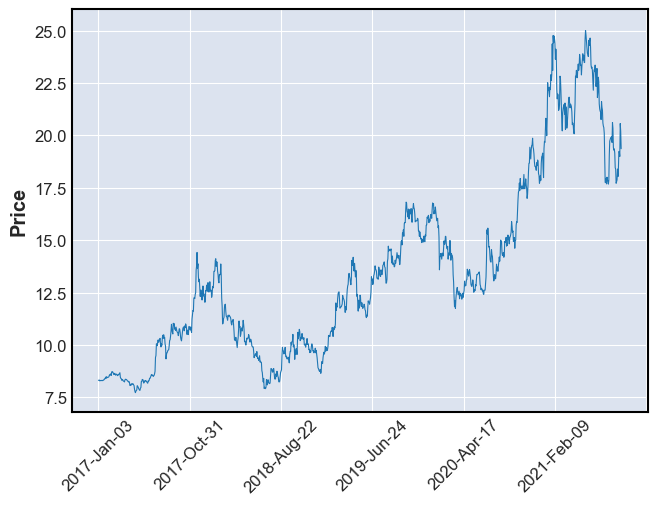

In [136]:
mpf.plot(df_new, type='line')

### 33 - 制作K线图｜添加移动均线

在上一题的基础上，添加5日、10日、15日移动均线

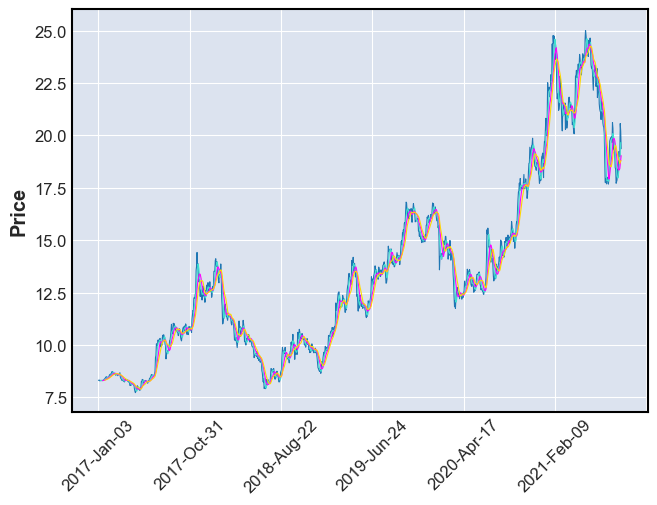

In [139]:
mpf.plot(df_new, type='line', mav = (5,10, 15),volume=False)

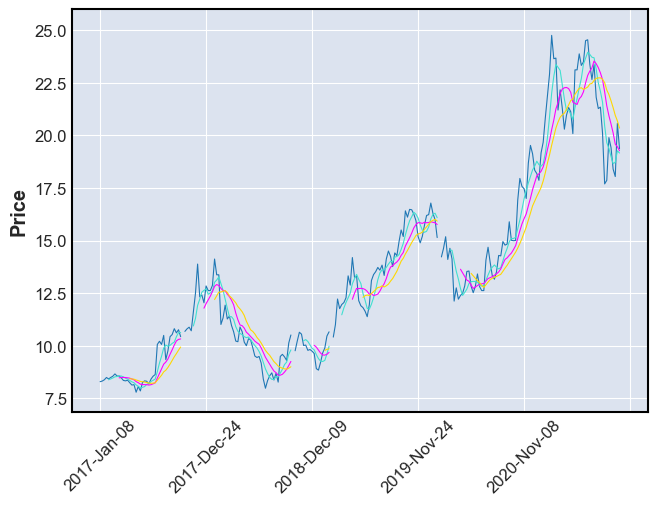

### 34 - 制作K线图｜添加成交量

在上一题的基础上，添加成交量

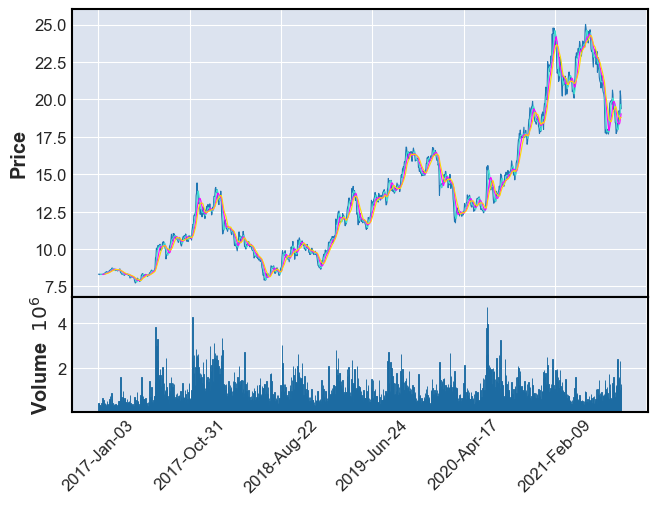

In [140]:
mpf.plot(df_new, type='line', mav = (5,10, 15),volume=True)

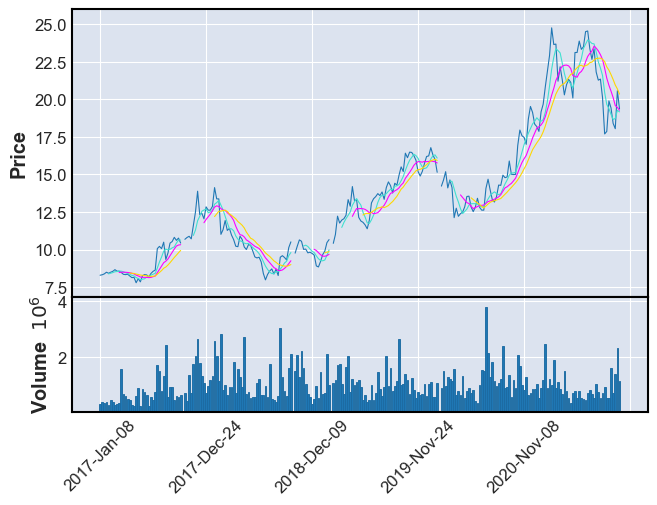

### 35 - 制作K线图｜周线

对 df1 进行重采样，制作周线级K线

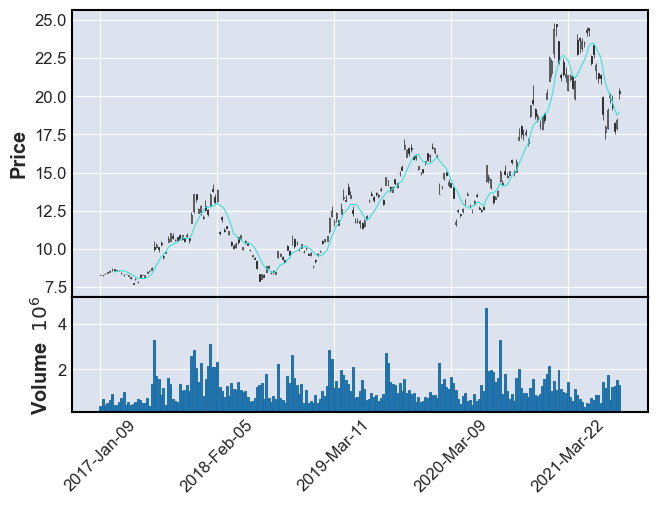

In [162]:
# df_new[df_new.index.isin(pd.date_range(start=df_new.iloc[0].name, end=df_new.iloc[len(df_new)-1].name, freq='W-MON'))]

mpf.plot(df_new[df_new.index.isin(pd.date_range(start=df_new.iloc[0].name, end=df_new.iloc[len(df_new)-1].name, freq='W-MON'))],type='candle', mav=(7), volume=True)

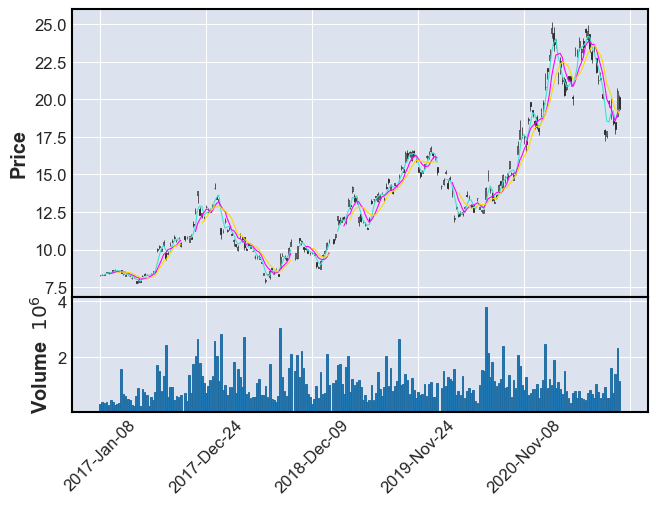

### 36 - 制作K线图｜蜡烛图

使用 df2 数据，筛选出 8月3日 的数据，制作蜡烛图

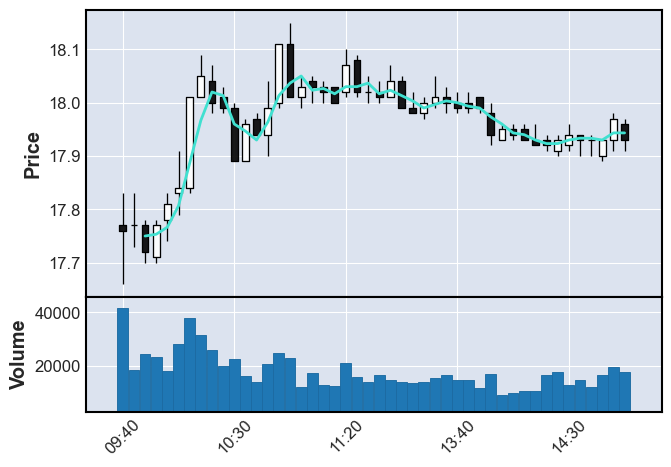

### 37 - 制作K线图｜展示非交易时间

<br>

使用 df2 数据，筛选 8月3日-8月4日的数据，制作蜡烛图并展示非交易时间区间